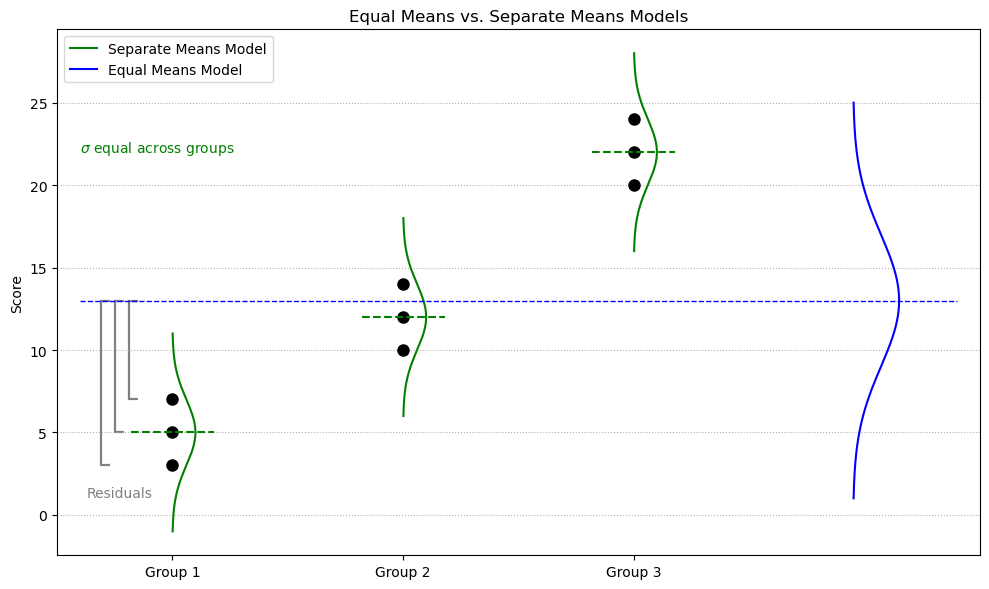

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Data
df = pd.DataFrame({
    "Group": [1]*3 + [2]*3 + [3]*3,
    "Score": [3, 5, 7, 10, 12, 14, 20, 22, 24]
})

group_means = df.groupby("Group")["Score"].mean()
grand_mean = df["Score"].mean()

# Group curve setup (taller and tighter)
sigma_group = 2
x_vals = np.linspace(-3*sigma_group, 3*sigma_group, 200)
density = norm.pdf(x_vals, 0, sigma_group)

# Equal means curve (more concentrated peak)
sigma_grand = 4  # tighter than earlier 7
x_vals_grand = np.linspace(-3*sigma_grand, 3*sigma_grand, 300)
density_grand = norm.pdf(x_vals_grand, 0, sigma_grand)

# Set up plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot individual observations
for i, group in enumerate(sorted(df["Group"].unique()), start=1):
    y = df[df["Group"] == group]["Score"]
    x = np.full_like(y, i)
    ax.plot(x, y, 'ko', markersize=8)

# Separate means model curves
for i, mu in enumerate(group_means, start=1):
    curve_y = mu + x_vals
    curve_x = i + density * 0.5
    ax.plot(curve_x, curve_y, color="green", label="Separate Means Model" if i == 1 else "", lw=1.5)
    ax.hlines(mu, i - 0.18, i + 0.18, color="green", linestyle="--", linewidth=1.5)

# Equal means model curve (right side, bell shape)
curve_y = grand_mean + x_vals_grand
curve_x = 3.95 + density_grand * 2.0
#ax.fill_betweenx(curve_y, 3.95, curve_x, color="blue", alpha=0.3)
ax.plot(curve_x, curve_y, color="blue", lw=1.5, label="Equal Means Model")
ax.axhline(grand_mean, 0+0.025, 1-0.025, color="blue", linestyle="--", linewidth=1)

# Adjusted base position and spacing
base_x = 0.85       # moved right from 1.05
dx = 0.06           # more spacing between brackets
bracket_depth = 0.04  # slightly deeper brackets

# Observed values and stagger offsets
residual_points = [
    (3, 2 * dx),  # outermost
    (5, dx),      # middle
    (7, 0)        # innermost
]

# Draw brackets
for y_obs, shift in residual_points:
    x_pos = base_x - shift
    y_top = grand_mean
    y_bot = y_obs

    verts = [
        (x_pos, y_bot),
        (x_pos - bracket_depth, y_bot),
        (x_pos - bracket_depth, y_top),
        (x_pos, y_top)
    ]
    codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO]
    path = Path(verts, codes)
    patch = PathPatch(path, color='gray', lw=1.6, fill=False)
    ax.add_patch(patch)

# Center y position for label (around y=5 and grand mean)
mid_y = (5 + grand_mean) / 2

# Shift label right to align with brackets
ax.text(base_x - 0.22, 1.3,
        "Residuals", fontsize=10, va='center', ha='left', color='gray')

# Layout and styling
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["Group 1", "Group 2", "Group 3"])
ax.set_xlim(0.5, 4.5)
ax.set_ylabel("Score")
ax.set_title("Equal Means vs. Separate Means Models")
ax.grid(axis="y", linestyle=":")
ax.legend(loc="upper left")

# σ note
ax.text(0.6, 22, r"$\sigma$ equal across groups", fontsize=10, color="green")

plt.tight_layout()
plt.show()


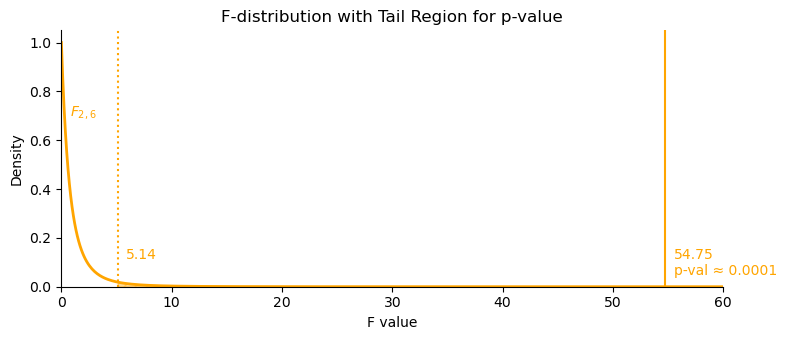

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Degrees of freedom
df1 = 2
df2 = 6

# F value from your sketch
F_stat = 54.75
critical = 5.14

# x-values for plotting the F-distribution
x = np.linspace(0, 60, 500)
y = f.pdf(x, df1, df2)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 3.5))
ax.plot(x, y, color="orange", lw=2, label=r"$F_{2,6}$")

# Shade area to the right of F_stat
x_fill = np.linspace(critical, 60, 300)
y_fill = f.pdf(x_fill, df1, df2)
ax.fill_between(x_fill, y_fill, color="orange", alpha=0.4, hatch="///", label="p-value area")

# Annotate F critical and F statistic
ax.axvline(critical, color="orange", linestyle=":")
ax.text(critical+0.75, 0.1, "5.14", color="orange", ha="left", va="bottom")

ax.axvline(F_stat, color="orange")
ax.text(F_stat+0.75, 0.1, "54.75", color="orange", ha="left", va="bottom")

# Annotate p-value
ax.text(F_stat + 0.75, 0.05, "p-val ≈ 0.0001", color="orange", fontsize=10)
ax.text(0.75, 0.7, "$F_{2,6}$", color="orange", fontsize=10)

# Style
ax.set_xlim(0, 60)
ax.set_ylim(bottom=0)
ax.set_xlabel("F value")
ax.set_ylabel("Density")
ax.set_title("F-distribution with Tail Region for p-value")
ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


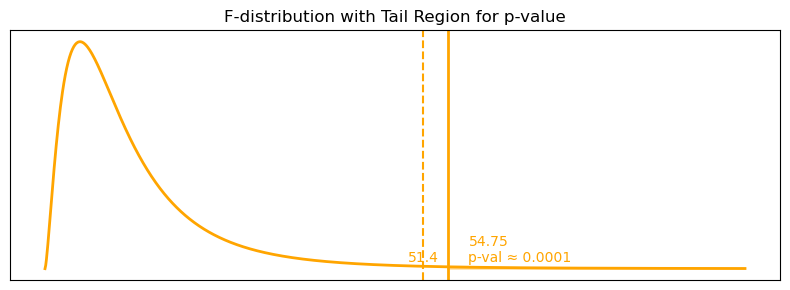

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Degrees of freedom for a right-skewed shape
df1 = 5
df2 = 10

# Generate F-distribution
x = np.linspace(0, 10, 1000)
y = f.pdf(x, df1, df2)

# Example F values
F_stat = 5.4
F_test = 5.75

# Plot setup
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, color="orange", linewidth=2)

# Shade p-value tail area
x_fill = np.linspace(F_test, 10, 300)
ax.fill_between(x_fill, f.pdf(x_fill, df1, df2), color="orange", alpha=0.3)

# Draw lines and annotate
ax.axvline(F_stat, color="orange", linestyle="dashed", linewidth=1.5)
ax.text(F_stat, 0.02, "51.4", color="orange", ha="center", fontsize=10)

ax.axvline(F_test, color="orange", linewidth=2)
ax.text(F_test + 0.3, 0.02, "54.75\np-val ≈ 0.0001", color="orange", ha="left", fontsize=10)

# Remove axes and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("F-distribution with Tail Region for p-value", fontsize=12)

plt.tight_layout()
plt.show()
